# [1] torchvisionを使ってランダムにクロップされたデータを実装してください。

※ ここではGoogle Colaraboratoryでの実行を想定しています。

※ Google Colaraboratoryでbashコマンドを実行するには、命令の前に!をつけます。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch7

/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch7


## 【a】クロップ後の画像は、クロップされていない元の画像とどのように異なるのか確認してください

In [ ]:
# 回答

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
torch.set_printoptions(edgeitems=2, linewidth=50)
torch.manual_seed(123)

In [14]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
print(f'imgs.shape: {imgs.shape}')

print(f'mean: {imgs.view(3, -1).mean(dim=1)}')
print(f'std: {imgs.view(3, -1).std(dim=1)}')

imgs.shape: torch.Size([3, 32, 32, 50000])
mean: tensor([0.4914, 0.4822, 0.4465])
std: tensor([0.2470, 0.2435, 0.2616])


In [34]:
# 訓練データ
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616)),
        transforms.RandomCrop(16)
    ])
)

# 検証データ
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616)),
        transforms.RandomCrop(16)
    ])
)

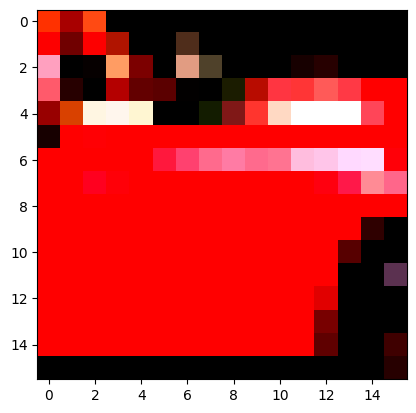

In [37]:
img_t_16, _ = cifar10[99]
plt.imshow(img_t_16.permute(1, 2, 0))
plt.show()

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

## 【b】同じ画像を2回クロップするとどうなるか確認してください

In [ ]:
# 回答

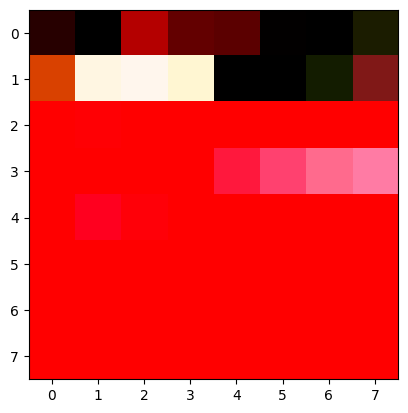

In [49]:
random_crop = transforms.RandomCrop(8)
img_t_8 = random_crop(img_t_16)

plt.imshow(img_t_8.permute(1, 2, 0))
plt.show()

## 【c】ランダムにクロップされた画像を使った訓練結果を確認してください

In [ ]:
# 回答

In [50]:
crop_size = 10

transform_w_crop = transforms.Compose([
    transforms.RandomCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
])

transforms_wo_crop = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
])

cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transform_w_crop
)

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transform_w_crop
)

In [51]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [52]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [53]:
import torch.nn as nn
import torch.optim as optim

input_size = 3*crop_size**2

model = nn.Sequential(
    nn.Linear(input_size, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)

learning_rate = 1e-3

n_epochs = 100

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 0.698841
Epoch: 1, Loss: 0.673866
Epoch: 2, Loss: 0.639616
Epoch: 3, Loss: 0.551865
Epoch: 4, Loss: 0.643111
Epoch: 5, Loss: 0.505215
Epoch: 6, Loss: 0.492353
Epoch: 7, Loss: 0.556420
Epoch: 8, Loss: 0.430116
Epoch: 9, Loss: 0.633410
Epoch: 10, Loss: 0.554215
Epoch: 11, Loss: 0.484738
Epoch: 12, Loss: 0.833330
Epoch: 13, Loss: 0.606883
Epoch: 14, Loss: 0.514503
Epoch: 15, Loss: 0.555984
Epoch: 16, Loss: 0.504401
Epoch: 17, Loss: 0.549099
Epoch: 18, Loss: 0.534642
Epoch: 19, Loss: 0.599902
Epoch: 20, Loss: 0.538552
Epoch: 21, Loss: 0.524273
Epoch: 22, Loss: 0.401249
Epoch: 23, Loss: 0.632946
Epoch: 24, Loss: 0.487354
Epoch: 25, Loss: 0.587979
Epoch: 26, Loss: 0.501412
Epoch: 27, Loss: 0.385466
Epoch: 28, Loss: 0.685130
Epoch: 29, Loss: 0.800436
Epoch: 30, Loss: 0.680664
Epoch: 31, Loss: 0.699082
Epoch: 32, Loss: 0.779618
Epoch: 33, Loss: 0.612140
Epoch: 34, Loss: 0.577042
Epoch: 35, Loss: 0.615651
Epoch: 36, Loss: 0.626904
Epoch: 37, Loss: 0.442163
Epoch: 38, Loss: 0.620

In [54]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("acc: %f" % (correct/total))

acc: 0.730800


In [55]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((labels == predicted).sum())
    print('val acc: %f' % (correct/total))


val acc: 0.741000


# [2] 損失関数を切り替えてください（可能であればMSE）

## 【a】訓練の振る舞いが変わるか確認してください

In [ ]:
# 回答

# [3] ネットワークの容量を十分に減らすことで、過学習を停止することは可能ですか？

## 【a】このとき、モデルは検証セットでどのように機能するか確認してください

In [ ]:
# 回答